# Setup

In [ ]:
!pip install graphviz

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn import tree

from dtreeviz.trees import *

In [ ]:
# load the datasets

iris = load_iris()
boston = load_boston()

# Training/Test sets

In [ ]:
# preparation
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#fit classifier
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

# Plotting graph using scikit-learn

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(167.4, 135.9, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(83.7, 81.53999999999999, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 81.53999999999999, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(209.25, 27.180000000000007, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(292.95, 27.180000000000007, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

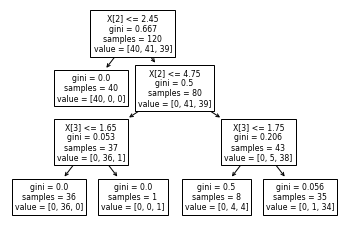

In [ ]:
tree.plot_tree(clf)

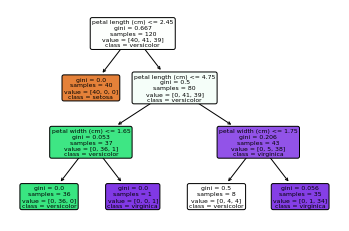

In [ ]:
# improving the graph

tree.plot_tree(clf,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               rounded=True, 
               filled = True);

# Plotting graph using Dtreeviz

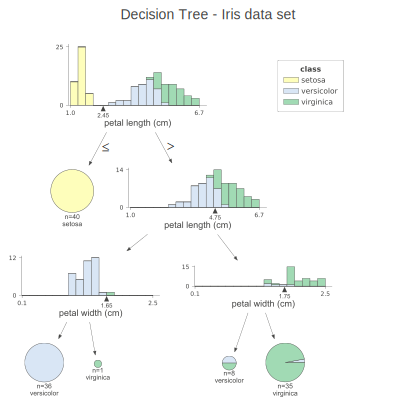

In [ ]:
viz = dtreeviz(clf, 
               x_data=x_train,
               y_data=y_train,
               target_name='class',
               feature_names=iris.feature_names, 
               class_names=list(iris.target_names), 
               title="Decision Tree - Iris data set")
viz

# Highlighting the path of the first observation of test set

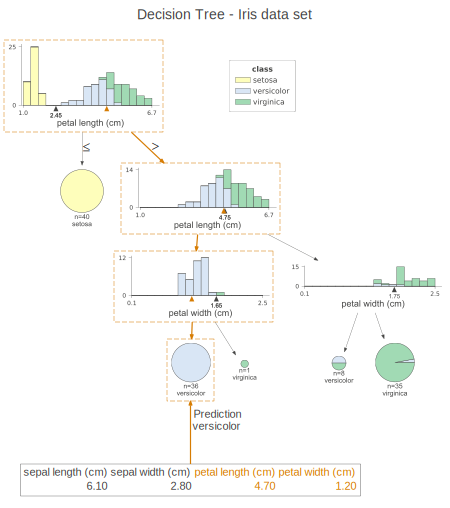

In [ ]:
viz = dtreeviz(clf, 
               x_data=x_train,
               y_data=y_train,
               target_name='class',
               feature_names=iris.feature_names, 
               class_names=list(iris.target_names),
               title="Decision Tree - Iris data set",
               #orientation="LR", 
               X=x_test[0])  
viz

# Print the decisions used for this observation’s prediction in plain English

In [ ]:
print(explain_prediction_path(clf, x_test[0], 
                              feature_names=iris.feature_names, 
                              explanation_type="plain_english"))

2.45 <= petal length (cm)  < 4.75
petal width (cm) < 1.65



# Regression example

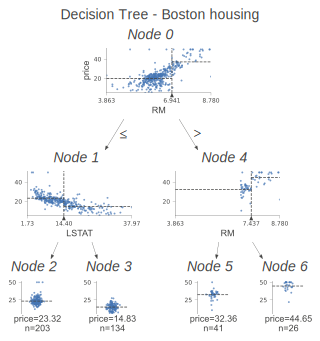

In [ ]:
# prepare data

X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fir the regressor
reg = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
reg.fit(X_train, y_train)

# plot the tree
viz = dtreeviz(reg,
               x_data=X_train,
               y_data=y_train,
               target_name='price',
               feature_names=boston.feature_names,
               title="Decision Tree - Boston housing",
               show_node_labels = True)
viz